# Problem Statement

In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.
education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                        header = None, skipinitialspace=True)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,
                       skiprows = 1, delimiter=',', skipinitialspace=True, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#Shape of the train and test data
train_set.shape

(32561, 15)

In [6]:
test_set.shape

(16281, 15)

In [7]:
#Number of unique values in each column
train_set.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
wage_class            2
dtype: int64

In [8]:
#Checking for null values
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [9]:
train_set.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Some cells have ? in them we need to remove those rows

# Data Cleaning

In [10]:
train_set = train_set[(train_set != '?').all(axis=1)]
test_set = test_set[(test_set != '?').all(axis=1)]

/home/shreya/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [11]:
# Converting clumn to label format
train_set['wage_class'] = train_set['wage_class'].map({'<=50K': 0, '>50K': 1})
test_set['wage_class'] = test_set['wage_class'].map({'<=50K.': 0, '>50K.': 1})

<AxesSubplot:xlabel='native_country', ylabel='count'>

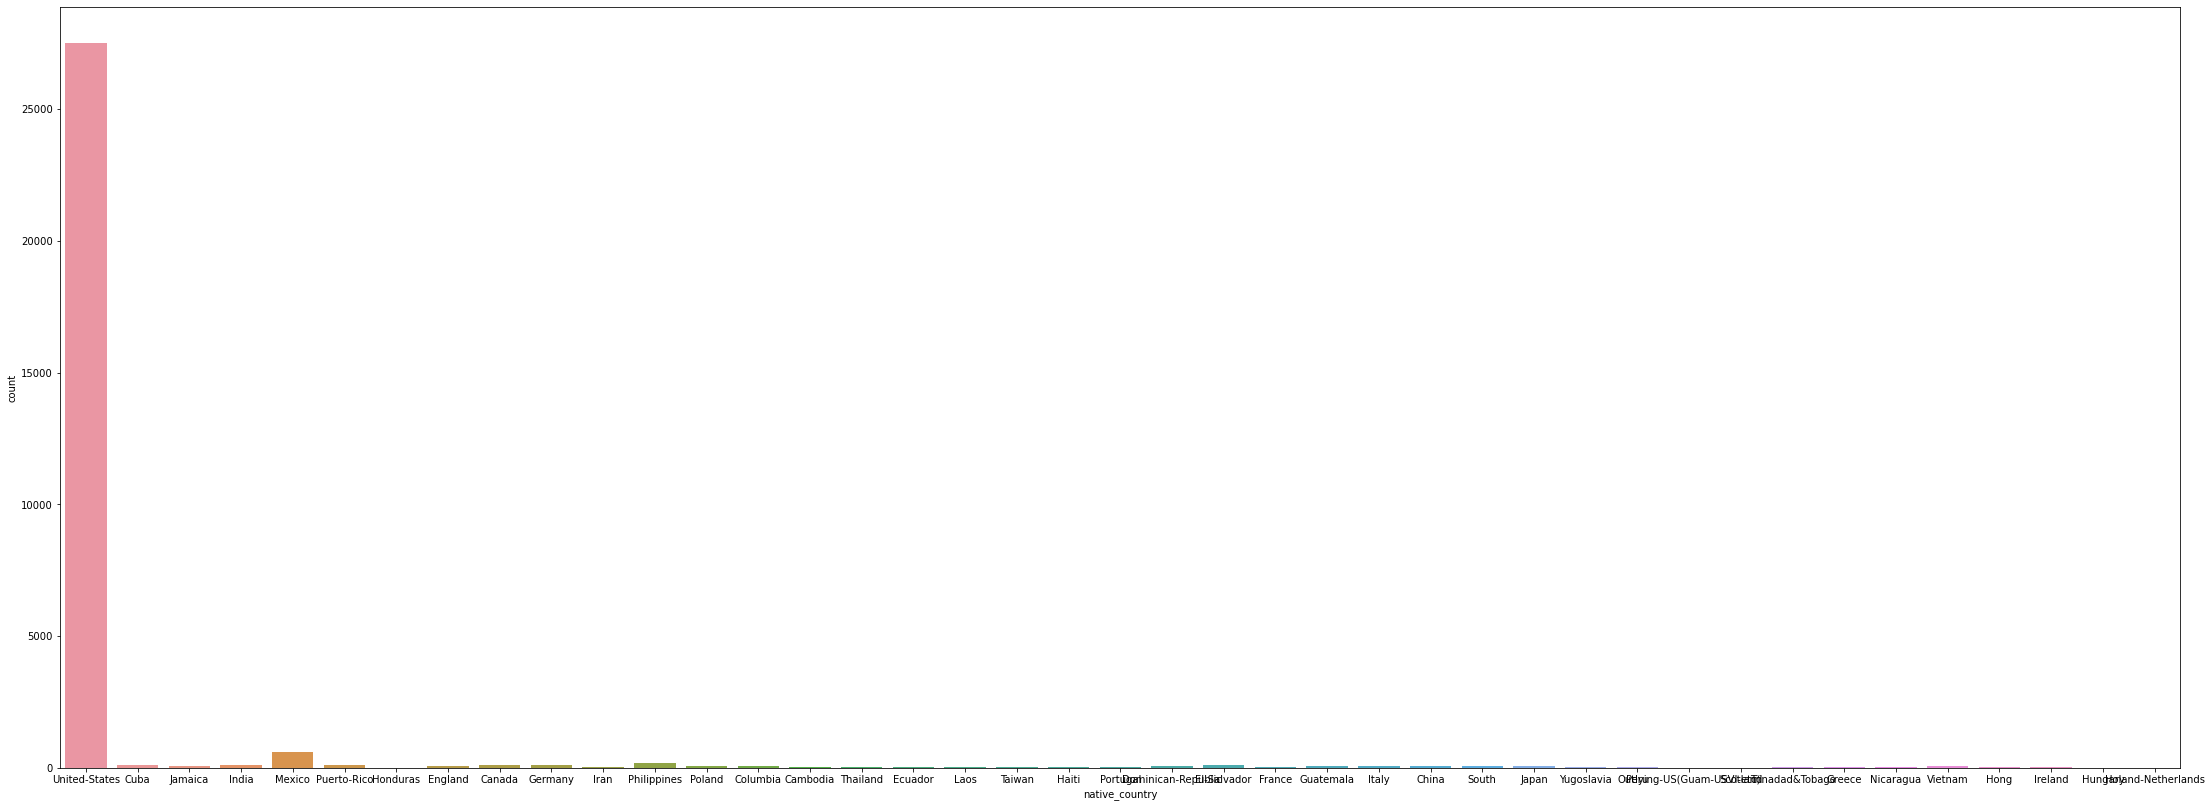

In [12]:
# Plotting the count of people from each countries
plt.figure(figsize=(38,14))
sns.countplot(x='native_country', data=train_set)

Since the dataset contains a large amount of data from USA, we need to drop the country column to remove bias

In [13]:
train_set.drop('native_country', axis=1, inplace=True)
test_set.drop('native_country', axis=1, inplace=True)
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


<AxesSubplot:>

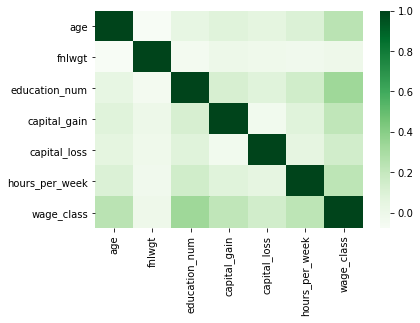

In [14]:
corr = train_set.corr()
sns.heatmap(corr, cmap='Greens')

Education column has been converted as education_num into numbers so we can drop education column.	

In [15]:
train_set.drop('education', axis=1, inplace=True)
test_set.drop('education', axis=1, inplace=True)

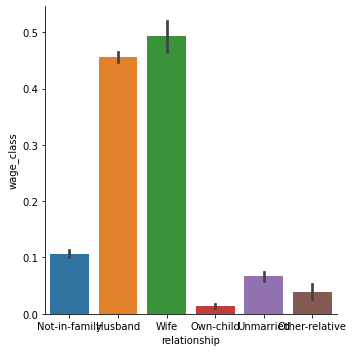

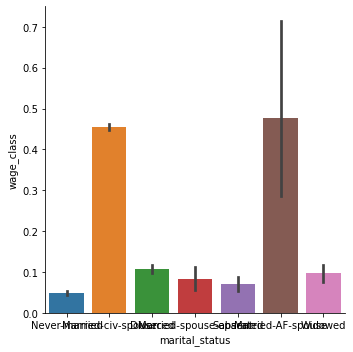

In [16]:
sns.catplot(x='relationship', y='wage_class', kind='bar', data=train_set)
sns.catplot(x='marital_status', y='wage_class', kind='bar', data=train_set)

Relationship and marital_status columns are very related so we can drop the relationship column

In [17]:
train_set.drop('relationship', axis=1, inplace=True)
test_set.drop('relationship', axis=1, inplace=True)

<AxesSubplot:xlabel='race', ylabel='count'>

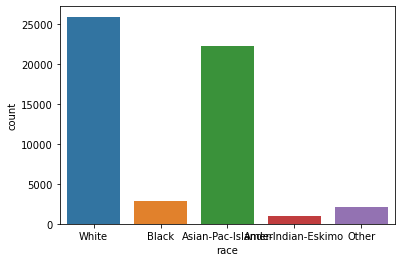

In [18]:
sns.countplot(x='workclass', data=train_set)
sns.countplot(x='race', data=train_set)

The workplace and race columns seem to be unven so we will drop these columns to reduce bias

In [19]:
train_set.drop(['workclass', 'race'], axis=1, inplace=True)
test_set.drop(['workclass', 'race'], axis=1, inplace=True)

 Converting marital_status column into categorical value with only two values married and unmarried

In [20]:
train_set["marital_status"] = train_set["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_set["marital_status"] = train_set["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_set["marital_status"] = train_set["marital_status"].map({"Married":0, "Single":1})
train_set["marital_status"] = train_set["marital_status"]

In [21]:
test_set["marital_status"] = test_set["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
test_set["marital_status"] = test_set["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
test_set["marital_status"] = test_set["marital_status"].map({"Married":0, "Single":1})
test_set["marital_status"] = test_set["marital_status"]

Converting sex into two columns using one hot encoding

In [22]:
onehotencoder = preprocessing.OneHotEncoder()
X = onehotencoder.fit_transform(train_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['sex'], axis=1, inplace=True)

In [23]:
X = onehotencoder.fit_transform(test_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['sex'], axis=1, inplace=True)

Removing any nan value again

In [31]:
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

Converting occupation to one hot encoding from both train and test set

In [ ]:
a = train_set['occupation'].unique()

In [26]:
X = onehotencoder.fit_transform(train_set['occupation'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['occupation'], axis=1, inplace=True)

In [27]:
X = onehotencoder.fit_transform(test_set['occupation'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['occupation'], axis=1, inplace=True)

Dropping the value to be predicted from both train and test dataset 

In [33]:
y_train = train_set['wage_class']
x_train = train_set.drop('wage_class', axis=1)

In [34]:
y_test = test_set['wage_class']
x_test = test_set.drop('wage_class', axis=1)

# Model Fitting
Fitting dataset into XGBoost model 

In [35]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = model.predict(x_test)

Printing the classification report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      9727
         1.0       0.75      0.61      0.67      3177

    accuracy                           0.86     12904
   macro avg       0.82      0.77      0.79     12904
weighted avg       0.85      0.86      0.85     12904



The accuracy is of 86%